<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/tutoria_3_ML_knn_desicion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

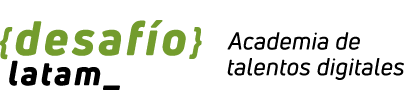

#<center><strong><font color="green">Árboles de decisión</font></strong></center>

##<strong><font color="green">Árboles de decisión</font></strong>
###<strong><font color="green">Construyendo el árbol</font></strong>

In [ ]:
1) lectura de data
2) Exploración y Limpieza
3) Estdistica (Graficos relaciones correlaciones numericas como categorias)
4) Normalizar
5) Elegir los mejores hiperparametros / Elegir el modelo
6) ejecutar el modelo
7) predicción
8) evaluar la predicción

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.tree import export_graphviz #permite exportar el árbol
import graphviz #permite ver el árbol

# Características del tiempo (pronóstico y temperatura)
features = [['sunny', 'hot'],
            ['sunny', 'mild'],
            ['overcast', 'hot'],
            ['rainy', 'mild'],
            ['rainy', 'cool'],
            ['rainy', 'cool'],
            ['overcast', 'mild'],
            ['sunny', 'cool']]

# Etiquetas (llevar paraguas o no)
labels = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no']

'''
Creamos un objeto LabelEncoder para codificar las características categóricas
(pronóstico y temperatura) en valores numéricos. Luego, se itera sobre cada
característica en features y se aplica la codificación a cada valor de la
característica utilizando el LabelEncoder. Los valores codificados se almacenan
en la lista features_encoded.
'''
le = preprocessing.LabelEncoder()
features_encoded = []
for i in range(len(features[0])):
    le.fit([row[i] for row in features])
    features_encoded.append(le.transform([row[i] for row in features]))

# Crear el clasificador de árbol de decisión
decision_tree = DecisionTreeClassifier()

# Entrenar el árbol de decisión
decision_tree.fit(list(zip(*features_encoded)), labels)

'''
Exportar el árbol de decisión en formato DOT
Se especifican varios parámetros como los nombres de las características y las
clases, el relleno y la forma de los nodos, y se desactiva la visualización de
la impureza de Gini.
'''
dot_data = export_graphviz(decision_tree, out_file=None,
                           feature_names=['pronóstico', 'temperatura'],
                           class_names=['no', 'yes'],
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           impurity=False,
                           leaves_parallel=False,
                           # samples_leaf=False
                           )

# Generar el gráfico del árbol de decisión
graph = graphviz.Source(dot_data)

# Guardar el gráfico como archivo de imagen (opcional)
graph.format = 'png'
graph.render('decision_tree')

# Mostrar el gráfico del árbol de decisión
graph.view()

#Para ver el árbol, abrir el archivo en la carpeta de este cuaderno

'decision_tree.png'

In [ ]:
features_encoded

[array([2, 2, 0, 1, 1, 1, 0, 2]), array([1, 2, 1, 2, 0, 0, 2, 0])]

###<strong><font color="green">Hiperparámetros</font></strong>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Cargar el dataset Breast Cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Definir los valores a probar para los hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Definir el árbol de decisión
tree = DecisionTreeClassifier()

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X, y)

# Obtener los resultados de la búsqueda
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Precisión con los mejores hiperparámetros:", best_score)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Precisión con los mejores hiperparámetros: 0.9261760596180716


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
len(y)

569

<center><strong>¡Ahora podemos regresar a nuestra presentación!</strong></center>

##<strong><font color="green">Ejercicio: calidad de vinos</font></strong>

Como siempre, cargamos las bibliotecas y la data necesaria.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 6)

In [ ]:
df = pd.read_csv('winequality.csv').drop(columns='Unnamed: 0')
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [ ]:
df.shape

(6497, 12)

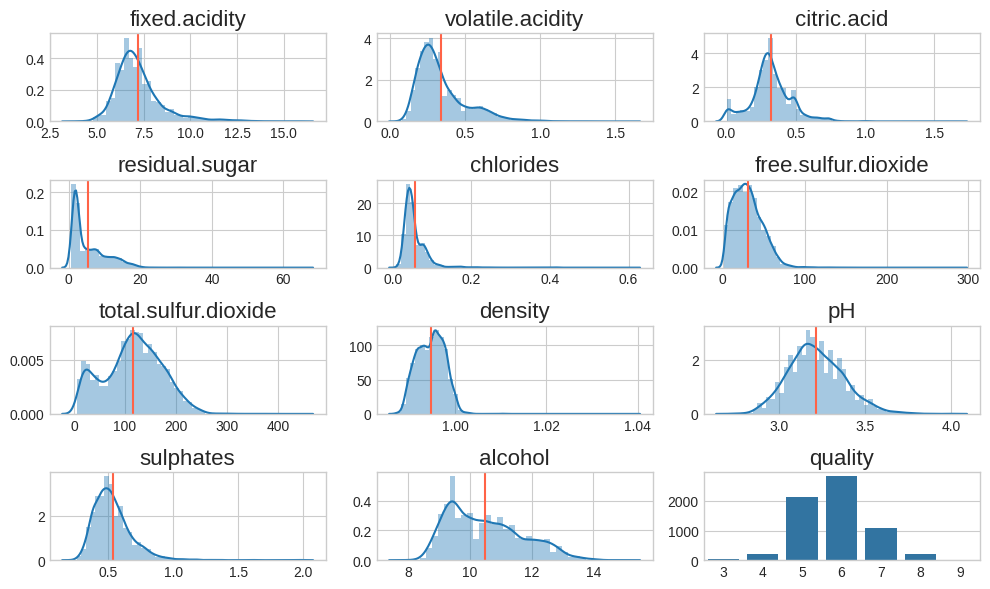

In [ ]:
rows = 4; cols = int(df.shape[1] / rows)
for index, colname in enumerate(df.columns):
    serie = df[colname]
    plt.subplot(rows, cols, index + 1)
    if colname == 'quality':
        sns.countplot(x=serie)
    else:
        sns.distplot(serie)
        plt.axvline(np.mean(serie), color='tomato')
    plt.title(colname, fontsize=16)
    plt.xlabel('');plt.ylabel('');plt.tight_layout()

In [ ]:
df['quality_bin'] = np.where(df['quality'] > np.mean(df['quality']), 1, 0)
df['quality_bin'].value_counts('%').round(3)

,proportion
quality_bin,
1,0.633
0,0.367


In [ ]:
# Generamos las muestras de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'fixed.acidity':'alcohol'], df['quality_bin'], random_state=11238, test_size=.33)

'''
Se definen dos pipelines, uno para el clasificador KNN (wine_knn) y otro para
el Árbol de Decisión (wine_tree). Cada pipeline consta de dos pasos: primero,
se aplica la transformación de escala estándar (StandardScaler) a los datos,
y luego se aplica el modelo correspondiente (KNeighborsClassifier o
DecisionTreeClassifier).

Un pipeline (también conocido como flujo de trabajo) en el contexto del
aprendizaje automático se refiere a una secuencia de pasos encadenados que
se ejecutan de manera secuencial para procesar y transformar datos, así como
para construir y evaluar modelos de manera más eficiente y organizada. Los
pipelines son una práctica común en el preprocesamiento y modelado de datos,
ya que ayudan a automatizar y sistematizar tareas repetitivas y a garantizar
que se sigan los mismos pasos en múltiples experimentos.
'''
wine_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

wine_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', DecisionTreeClassifier())
])


In [ ]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
df2 = df.loc[:, 'fixed.acidity':'alcohol']
df2

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
'''Cada pipeline se entrena utilizando los datos de entrenamiento
(X_train, y_train), y luego se realizan predicciones en los datos de prueba
(X_test) para calcular el F1-score para cada modelo.
'''

wine_knn.fit(X_train, y_train)
y_hat = wine_knn.predict(X_test)
f1_knn = f1_score(y_test, y_hat)

wine_tree.fit(X_train, y_train)
y_hat = wine_tree.predict(X_test)
f1_tree = f1_score(y_test, y_hat)

print(f'El F1 Score de KNN es: {f1_knn:.3f}')
print(f'El F1 Score del decision tree es: {f1_tree:.3f}')

El F1 Score de KNN es: 0.808
El F1 Score del decision tree es: 0.813


In [ ]:
'''
Se define una cuadrícula de hiperparámetros (params) que serán explorados
mediante búsqueda exhaustiva (GridSearchCV) en el modelo del Árbol de Decisión.
Los hiperparámetros incluyen min_samples_split, criterion, max_depth y
min_samples_leaf. La búsqueda  se realiza utilizando validación cruzada
con 5 pliegues (cv=5).
'''
params = {'min_samples_split': np.linspace(0.1, 1.0, 5),
          'criterion': ['gini', 'entropy'],
          'max_depth': np.arange(1, 15),
          'min_samples_leaf': np.linspace(0.1, 0.5, 5)
          }



# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y su puntaje
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Puntaje del modelo con los mejores hiperparámetros:", best_score)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
Puntaje del modelo con los mejores hiperparámetros: 0.7368990590812516


In [ ]:
np.linspace(0.1, 1.0, 5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [ ]:
'''
Se imprime un informe de clasificación utilizando classification_report, que
muestra varias métricas de evaluación del modelo en los datos de prueba, como
precisión, recall, F1-score, entre otros
'''
y_hat = grid_search.predict(X_test)
report_ = classification_report(y_test, y_hat)
print(report_)

              precision    recall  f1-score   support

           0       0.64      0.65      0.64       815
           1       0.78      0.77      0.78      1330

    accuracy                           0.73      2145
   macro avg       0.71      0.71      0.71      2145
weighted avg       0.73      0.73      0.73      2145



In [ ]:
### repaso desafio

df = pd.read_excel('Telco-Customer-Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [ ]:
df.shape

(7043, 21)

In [ ]:
#Realizar un análisis exploratorio de los datos para comprender las características y la
#distribución de los datos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df['TotalCharges'].value_counts()

,count
TotalCharges,
20.20,11
19.75,9
20.05,8
19.90,8
19.65,8
...,...
6849.40,1
692.35,1
130.15,1


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
## revisar datos unicos y faltantes
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
rows = 4; cols = int(df.shape[1] / rows)
for index, colname in enumerate(df.columns):
    serie = df[colname]
    plt.subplot(rows, cols, index + 1)
    if colname == 'quality':
        sns.countplot(x=serie)
    else:
        sns.distplot(serie)
        plt.axvline(np.mean(serie), color='tomato')
    plt.title(colname, fontsize=16)
    plt.xlabel('');plt.ylabel('');plt.tight_layout()


### ojo

## para variables categoricas Chi-cuadrado (variable vs churn)

chi2, p, _, _ = chi2_contingency(pd.crosstab(df[feature], df['Churn']))

## para variables numericas Peasson (variables vs churn)

corr, _ = pearsonr(dfi[feature], dfi['Churn'].replace({'No': 0, 'Yes':1}))

In [ ]:
# Preprocesar los datos, incluyendo la limpieza, la transformación y la normalización
# de las características según sea necesario.

import pandas as pd

df_final = df.drop(['customerID'],axis=1)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency, ks_2samp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



le=LabelEncoder()

categorical_features = df.select_dtypes(include=[object]).columns.tolist()

for columna in categorical_features[1:]:
  df_final[columna] = le.fit_transform(df_final[columna])


df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_final['PaymentMethod'].value_counts()

,count
PaymentMethod,
2,2365
3,1612
0,1544
1,1522


In [ ]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features ##

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

GridSearchCV

In [ ]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

GridSearchCV

In [ ]:
def evaluate_model(model, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy del modelo: {accuracy:.2f}")

    # Generar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title('Matriz de Confusión')
    plt.show()

    # Mostrar el reporte de clasificación con métricas como precisión, recall y f1-score
    report = classification_report(y_test, y_pred)
    print("Reporte de clasificación:")
    print(report)